## Observations and Insights 

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset (1893)
combined_data_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
combined_data_df
#mouse_metadata #249
#study_results #1893

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [22]:
# Checking the number of mice.
len(combined_data_df["Mouse ID"].unique())

249

In [23]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data_df_dup = combined_data_df[combined_data_df.duplicated(subset=["Mouse ID","Timepoint"], keep=False)]
combined_data_df_dup["Mouse ID"].drop_duplicates()

908    g989
Name: Mouse ID, dtype: object

In [24]:
# Optional: Get all the data for the duplicate mouse ID. 
#duplicate mouse df
combined_data_df_dup


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# No duplicate data frame would suppress mouse id found in the duplicate mouse df
combined_data_df_no_dup = combined_data_df.loc[(~combined_data_df["Mouse ID"].isin(combined_data_df_dup["Mouse ID"]))]
combined_data_df_no_dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [26]:
# Checking the number of mice in the clean DataFrame.
len(combined_data_df_no_dup["Mouse ID"].unique())

248

## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stat1 = combined_data_df_no_dup.groupby(["Drug Regimen"])
stat1["Tumor Volume (mm3)"].mean()
stat1["Tumor Volume (mm3)"].median()
stat1["Tumor Volume (mm3)"].var()
stat1["Tumor Volume (mm3)"].std()
stat1["Tumor Volume (mm3)"].sem()
summaryStat = pd.DataFrame({"Mean":stat1["Tumor Volume (mm3)"].mean(),"Median":stat1["Tumor Volume (mm3)"].median(),"Variance":stat1["Tumor Volume (mm3)"].var(),"Standard Deviation":stat1["Tumor Volume (mm3)"].std(),"SEM":stat1["Tumor Volume (mm3)"].sem()})
summaryStat
summaryStat.rename_axis("")
# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Mean,Median,Variance,Standard Deviation,SEM
,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
# Renaming aggregate columns using dictionary unpacking
combined_data_df_no_dup.groupby(["Drug Regimen"]).agg(**{'Mean':("Tumor Volume (mm3)","mean"),'Median':("Tumor Volume (mm3)","median"),'Variance':("Tumor Volume (mm3)","var"),'Standard Deviation':("Tumor Volume (mm3)","std"),'SEM':("Tumor Volume (mm3)","sem")})


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

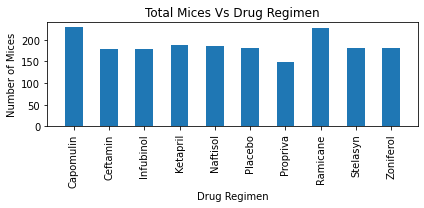

In [54]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
stat1["Mouse ID"].count()
total_mice_plot = stat1["Mouse ID"].count().plot(kind="bar", figsize=(6,3))
plt.title("Total Mices Vs Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mices")
plt.xlim(-0.75, len(x_axis) -.25)
plt.ylim(0, max(stat1["Mouse ID"].count()) + 10)
plt.tight_layout()

<function matplotlib.pyplot.show(close=None, block=None)>

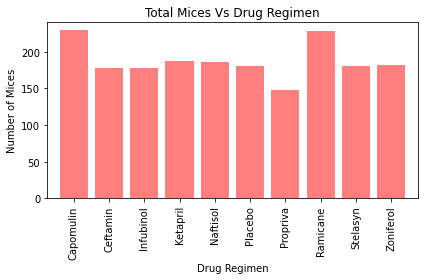

In [48]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Set x axis and tick locations
x_axis = np.arange(len(stat1["Mouse ID"]))
plt.bar(x_axis, stat1["Mouse ID"].count(), color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, stat1["Drug Regimen"].max(), rotation="vertical")

plt.title("Total Mices Vs Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mices")

plt.xlim(-0.75, len(x_axis) -.25)
plt.ylim(0, max(stat1["Mouse ID"].count()) + 10)
plt.tight_layout()
plt.show

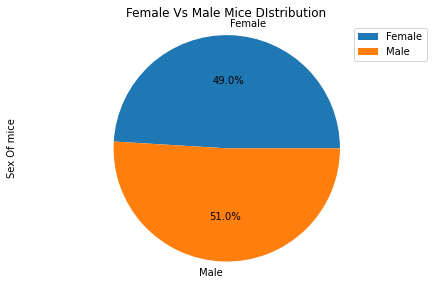

In [104]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_group = combined_data_df_no_dup.groupby(["Sex"])
mice_group["Mouse ID"].count() 

mice_sex_pie = mice_group["Mouse ID"].count().plot(kind="pie",autopct="%1.1f%%",title="Female Vs Male Mice DIstribution")
mice_sex_pie.set_ylabel("Sex Of mice")
plt.legend(mice_group.Sex.max(),loc="best")
plt.tight_layout()
plt.axis("equal")
plt.show()


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
